In [0]:
#Kill google colab
!kill -9 -1

# Download Data

In [0]:
# Code to read csv file into Colaboratory:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [0]:
link = 'https://drive.google.com/open?id=1QJPpFDz3xhlT8ySfAYHuJByqdp8_C7WH'

In [4]:
fluff, id = link.split('=')
print (id) # Verify that you have everything after '='

1QJPpFDz3xhlT8ySfAYHuJByqdp8_C7WH


In [0]:
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('prostateX-Register-chopedcropped-60-4channels')  
# Dataset is now stored in a Pandas Dataframe

In [6]:
!ls

adc.json  prostateX-Register-chopedcropped-60-4channels  sample_data


# Import library And Read Data

In [7]:
%matplotlib inline
%reload_ext autoreload
%autoreload 2

import pickle
import numpy as np
import pandas as pd
import os
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.image import imread
import cv2
import glob
from math import log
from bisect import bisect_left
import pickle
from google.colab import files
from tqdm import tqdm
from pathlib import Path
import tensorflow as tf
import itertools

from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential, load_model
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers.convolutional import Convolution3D, MaxPooling3D
from keras.engine.input_layer import Input
from keras.layers import Conv2D, MaxPooling2D
from keras.optimizers import SGD, RMSprop
from keras.utils import np_utils, generic_utils
from sklearn import preprocessing
from keras import optimizers
from keras.callbacks import ModelCheckpoint, LearningRateScheduler, EarlyStopping
from keras import applications
from keras.preprocessing.image import ImageDataGenerator
from keras import optimizers
from keras import regularizers
from keras.models import Sequential, Model 
from keras.layers import Dropout, Flatten, Dense, GlobalAveragePooling2D, Activation
from keras import backend as K 
from keras.callbacks import ModelCheckpoint, LearningRateScheduler, TensorBoard, EarlyStopping
from keras.utils import to_categorical
from keras.layers import BatchNormalization
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

from sklearn.utils import class_weight
from sklearn.metrics import confusion_matrix
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import roc_auc_score as areauc

from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels

Using TensorFlow backend.


In [0]:
infile = open("prostateX-Register-chopedcropped-60-4channels",'rb')
Images = pickle.load(infile)
Labels = pickle.load(infile)
Coordinates = pickle.load(infile)
Case = pickle.load(infile)
infile.close()
# print(Images.shape)
# muchLabels = [i if i.shape == () else i[len(i)-1] for i in Labels]

# #Convert 6 classes labels to 2 class
# muchLabels = [0 if i == 1 else 1 for i in muchLabels]

# #Convert 2 class labels to 1 hot-encoded
# catLabels = np_utils.to_categorical(muchLabels)
# print(len(muchLabels))

In [9]:
Images.shape

(112, 5, 60, 60, 4)

In [10]:
!ls

adc.json  prostateX-Register-chopedcropped-60-4channels  sample_data


In [0]:
len(Coordinates)
Coordinates

In [0]:
# #find Z slice that is postive
# pos = [[j[2] for j in i] for i in Coordinates]

# #label Z slice '1' and all other slice '0'
# binaryLabels = []
# for i in range(Images.shape[0]):
#   print("patient:" + str(i))
#   casebinaryLabels = []
#   for j in range(Images.shape[1]):
#     print(j)
#     case = pos[i]
#     casebin = 0
#     for x in case:
#       print("---------" +str(x))
#       #Condition where which slices are positive 
#       if(j == x)|(j == x-1)|(j == x+1):
#         casebin =1
#     print("casebin:"+str(casebin))
#     if(casebin == 0):
#       casebinaryLabels += [0]
#     else:
#       casebinaryLabels += [1]
# #         print(casebinaryLabels)
#   binaryLabels += [casebinaryLabels]

In [0]:
# much = [np.array(Images[i]) for i in range(len(Images))]
# len(much)
# muchLabels = [i if i.shape == () else i[0] for i in Labels]
# len(muchLabels)

In [0]:
# index = []
# for i in range(0, len(much)):
#   if much[i].shape != (19,150,150):
#     index += [i]
    
# much= np.delete(much, index)
# muchLabels = np.delete(muchLabels, index)

# 3D Model

In [0]:
# binaryLabels = [ 0 if i ==1 else 1 for i in Labels ]
# binaryLabelsreshape = np_utils.to_categorical(binaryLabels)

Labels  = [ i-1 for i in Labels ]

labelsreshape = np_utils.to_categorical(Labels, num_classes=5)

In [12]:
labelsreshape.shape

(112, 5)

In [19]:
len(Labels)
Images.shape

(112, 5, 60, 60, 4)

In [0]:
!rm current.h5

In [0]:
import keras
from keras.datasets import mnist
from keras.models import Model
from keras.layers import Conv3D, Dense, Flatten, MaxPooling3D
from keras import backend as K

def create_base_network(inputs):
    '''Base network to be shared (eq. to feature extraction).
    '''
    x = Conv3D(16, kernel_size=(1, 3, 3), activation='relu')(inputs)
    x = Conv3D(16, (3, 1, 1), activation='relu')(x)
    #-------------------------------------------------------------------------
    x = Conv3D(32, (1, 3, 3), activation='relu')(x)
    x = Conv3D(32, (3, 1, 1), activation='relu')(x)
    #-------------------------------------------------------------------------
    x = Conv3D(32, (1, 3, 3), activation='relu')(x)
    
#     x = MaxPooling3D(pool_size=(1, 2, 2))(x)
    
#     x = Conv3D(16, (1, 3, 3), activation='relu')(x)
# #     x = Conv3D(16, (3, 3, 3), activation='relu')(x)
#     x = Conv3D(32, (1, 3, 3), activation='relu')(x)
#     x = Conv3D(32, (3, 3, 3), activation='relu')(x)
#     x = Conv3D(32, (3, 3, 3), activation='relu')(x)
    
    x = Flatten()(x)
    x = Dense(64, activation='relu')(x)
 
    return x

In [41]:
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import np_utils
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.preprocessing import LabelEncoder

def baseline_model():
  input_shape = (5, 60, 60, 4)
  input1 = Input(shape=input_shape)
  mod1 = create_base_network(input1)
  x = keras.layers.concatenate([mod1, input2])
  # output = Dense(1, activation='sigmoid')(mod1)
  output = Dense(5, activation='softmax')(mod1)

  model = Model(inputs=[input1], outputs=[output])
  # model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
  sgd = optimizers.SGD(lr=0.0001)
  model.compile(loss='categorical_crossentropy', optimizer= sgd, metrics=['accuracy'])
#   model.summary()
  return model

estimator = KerasClassifier(build_fn=baseline_model, nb_epoch=50, batch_size=4, verbose=1)
X_train, X_test, Y_train, Y_test = train_test_split(Images, labelsreshape, test_size=0.2, random_state=0)
print(X_train.shape)
estimator.fit(X_train, Y_train)

kfold = KFold(n_splits=5, shuffle=True, random_state=1)
results = cross_val_score(estimator, Images, labelsreshape, cv=kfold)

print(results)
# # Save the model according to the conditions  
# MODEL = 'current.h5' 
# checkpoint = ModelCheckpoint(MODEL, monitor='val_acc', verbose=1, save_best_only=True, save_weights_only=False, mode='auto', period=1)
# early = EarlyStopping(monitor='val_loss', min_delta=0, patience=10, verbose=1, mode='auto')


# BATCH_SIZE = 1
# # Train the model 
# hist= model.fit(
# x= [train_X], y=train_y,
# epochs = 50,
# batch_size=BATCH_SIZE,
# validation_data = (val_X, val_y),
# callbacks = [checkpoint, early],
# class_weight = class_weights
# )

(89, 5, 60, 60, 4)
Epoch 1/1
89/89 [==============================] - 7s 78ms/step - loss: 15.0315 - acc: 0.0674
Epoch 1/1
23/23 [==============================] - 3s 117ms/step
Epoch 1/1
23/23 [==============================] - 3s 118ms/step
Epoch 1/1
22/22 [==============================] - 3s 125ms/step
Epoch 1/1
22/22 [==============================] - 3s 129ms/step
Epoch 1/1
22/22 [==============================] - 3s 131ms/step
[0.21739131 0.30434783 0.09090909 0.09090909 0.31818182]


In [30]:
results

array([0.21739131, 0.26086957, 0.36363636, 0.27272727, 0.31818182])

In [0]:
ReImages = Images.reshape(99*19, 150, 150, 3)
ReImages.shape
Rebinary= binaryLabels.reshape(99*19)
Rebinary.shape

(1881,)

In [0]:
ReImages.shape

(1881, 150, 150, 3)

In [0]:
train_X = ReImages[:1200]
print(len(train_X))
train_y = Rebinary[:1200]
print(len(train_y))

val_X = ReImages[1200:]
print(len(val_X))
val_y = Rebinary[1200:]
print(len(val_y))

1200
1200
681
681


In [0]:
train_X.shape

(1200, 150, 150, 3)

In [0]:
img_width, img_height = 150,150

base_model = applications.VGG19(weights = "imagenet", include_top=False, input_shape = (img_width, img_height, 3))

model = Model(inputs=base_model.input, outputs=base_model.get_layer('block5_pool').output)

for layer in model.layers:
    layer.trainable = True
# kernel_regularizer=regularizers.l2(0.01)
#Adding custom Layers 
x = model.output
x = Flatten()(x)
# x = Dense(22, activation="relu")(x)
x = Dense(20, activation="relu")(x)
x= BatchNormalization(axis=1)(x)
# kernel_regularizer=regularizers.l2(0.0009)
x = Dropout(0.5)(x)
x = Dense(20, activation="relu")(x)
# x = Dense(22, activation="relu")(x)
x= BatchNormalization(axis=1)(x)
predictions = Dense(1, activation="sigmoid")(x)

# creating the final model 
model_final = Model(input = model.input, output = predictions)

# compile the model 
model_final.compile(loss= "binary_crossentropy", optimizer = optimizers.SGD(lr=0.0001, momentum=0.9, nesterov=False),  metrics=["binary_accuracy"])
# model_final.summary()
# optimizers.SGD(lr=0.001)

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:24: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("de...)`


In [0]:
datagen = ImageDataGenerator(
    featurewise_center=True,
    featurewise_std_normalization=True,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True)

test_datagen = ImageDataGenerator(
    featurewise_center=True,
    featurewise_std_normalization=True,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True)

datagen.fit(train_X)

test_datagen.fit(train_X)

validation_generator = test_datagen.flow(val_X, val_y, batch_size=16)

In [0]:
MODEL = "current.h5"
if os.path.isfile(MODEL):
  model_final.load_weights(MODEL)
# Save the model according to the conditions  
checkpoint = ModelCheckpoint(MODEL, monitor='val_binary_accuracy', verbose=1, save_best_only=True, save_weights_only=False, mode='auto', period=1)
early = EarlyStopping(monitor='val_loss', min_delta=0, patience=10, verbose=1, mode='auto')


model_final.fit_generator(datagen.flow(train_X, train_y, batch_size=16),
                          steps_per_epoch=len(train_X) / 16,
                          validation_data = validation_generator,
                          validation_steps =len(val_X) / 16,
                          callbacks = [checkpoint, early],
                          epochs=30)

Instructions for updating:
Use tf.cast instead.
Epoch 1/30
75/75 [==============================] - 35s 469ms/step - loss: 0.8542 - binary_accuracy: 0.5333 - val_loss: 1.0062 - val_binary_accuracy: 0.4273
Epoch 2/30
75/75 [==============================] - 28s 375ms/step - loss: 0.8096 - binary_accuracy: 0.5583 - val_loss: 0.7270 - val_binary_accuracy: 0.8282
Epoch 3/30
75/75 [==============================] - 28s 376ms/step - loss: 0.7660 - binary_accuracy: 0.5708 - val_loss: 0.5173 - val_binary_accuracy: 0.8238
Epoch 4/30
75/75 [==============================] - 28s 374ms/step - loss: 0.7149 - binary_accuracy: 0.6000 - val_loss: 1.0354 - val_binary_accuracy: 0.1806
Epoch 5/30
75/75 [==============================] - 28s 375ms/step - loss: 0.6981 - binary_accuracy: 0.6183 - val_loss: 0.4594 - val_binary_accuracy: 0.8238
Epoch 6/30
75/75 [==============================] - 28s 376ms/step - loss: 0.6765 - binary_accuracy: 0.6342 - val_loss: 0.4505 - val_binary_accuracy: 0.8282
Epoch 7/30

In [0]:
# All parameter gradients will be clipped to
# a maximum value of 0.5 and
# a minimum value of -0.5.
sgd = optimizers.SGD(lr=0.01)
BATCH_SIZE = 1

#Set Classweight0
# trainStats = np.unique(train_y, return_counts=True)

# if trainStats[1][0] > trainStats[1][1]: 
#     classweight = {0:1, 1:trainStats[1][0]/trainStats[1][1]}
# else:
#     classweight = {0:trainStats[1][1]/trainStats[1][0], 1:1}

# print(classweight)

# image specification
img_rows,img_cols,img_depth, channels =60,60,5,4

# CNN Training parameters
nb_classes = 2
nb_epoch = 50

MODEL = 'current.h5' 
model_exists = os.path.exists(MODEL)
if (model_exists):
    model = load_model(MODEL)
    print("**************************************************")
    print("current.h5 model loaded")

else:
    model = Sequential()
    model.add(Convolution3D(
        16,
        kernel_dim1=1, # depth
        kernel_dim2=3, # rows
        kernel_dim3=3, # cols
        input_shape=(img_depth, img_rows, img_cols, channels),
        activation='relu'
    ))
    
#     model.add(MaxPooling3D(pool_size=(1, 1, 1)))
    
    model.add(Convolution3D(
        32,
        kernel_dim1=2, # depth
        kernel_dim2=3, # rows
        kernel_dim3=3, # cols
        activation='relu'
    ))
    
    model.add(Convolution3D(
        32,
        kernel_dim1=2, # depth
        kernel_dim2=3, # rows
        kernel_dim3=3, # cols
        activation='relu'
    ))
    
#     model.add(MaxPooling3D(pool_size=(1, 1, 1)))
    
#     model.add(Dropout(0.5))

    model.add(Flatten())

    model.add(Dense(256, activation='relu'))

    model.add(Dropout(0.5))

    model.add(Dense(2))

    model.add(Activation('softmax'))

    model.compile(loss='categorical_crossentropy', optimizer= sgd, metrics=['accuracy'])
    
    
# Save the model according to the conditions  
checkpoint = ModelCheckpoint(MODEL, monitor='acc', verbose=1, save_best_only=True, save_weights_only=False, mode='auto', period=1)
early = EarlyStopping(monitor='acc', min_delta=0, patience=10, verbose=1, mode='auto')

# Train the model 
hist= model.fit(
x=train_X, y=train_y,
epochs = 30,
batch_size=BATCH_SIZE,
validation_data = (val_X, val_y),
callbacks = [checkpoint, early],
class_weight = class_weights
)

Instructions for updating:
Use tf.cast instead.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:36: UserWarning: Update your `Conv3D` call to the Keras 2 API: `Conv3D(16, (1, 3, 3), input_shape=(5, 60, 60..., activation="relu")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:46: UserWarning: Update your `Conv3D` call to the Keras 2 API: `Conv3D(32, (2, 3, 3), activation="relu")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:54: UserWarning: Update your `Conv3D` call to the Keras 2 API: `Conv3D(32, (2, 3, 3), activation="relu")`


Train on 111 samples, validate on 1 samples
Epoch 1/30
111/111 [==============================] - 11s 103ms/step - loss: 5.4936 - acc: 0.6577 - val_loss: 1.1921e-07 - val_acc: 1.0000

Epoch 00001: acc improved from -inf to 0.65766, saving model to current.h5
Epoch 2/30
111/111 [==============================] - 5s 47ms/step - loss: 5.2275 - acc: 0.6757 - val_loss: 1.1921e-07 - val_acc: 1.0000

Epoch 00002: acc improved from 0.65766 to 0.67568, saving model to current.h5
Epoch 3/30
111/111 [==============================] - 5s 47ms/step - loss: 5.2275 - acc: 0.6757 - val_loss: 1.1921e-07 - val_acc: 1.0000

Epoch 00003: acc did not improve from 0.67568
Epoch 4/30
111/111 [==============================] - 5s 47ms/step - loss: 5.2275 - acc: 0.6757 - val_loss: 1.1921e-07 - val_acc: 1.0000

Epoch 00004: acc did not improve from 0.67568
Epoch 5/30
111/111 [==============================] - 5s 47ms/step - loss: 5.2275 - acc: 0.6757 - val_loss: 1.1921e-07 - val_acc: 1.0000

Epoch 00005: acc di

KeyboardInterrupt: ignored

In [0]:
 if os.path.isfile("current.h5"):
      model.load_weights("current.h5")
preds = np.argmax(model.predict([val_X]), axis =-1)

In [0]:
truths = np.array(binaryLabels[:34])

In [0]:
# define confusion matrix function
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

#     plt.figure(figsize= (10,10))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, fontsize=15)
#     plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45, fontsize=15)
    plt.yticks(tick_marks, classes, fontsize=15)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="black" if cm[i, j] > thresh else "black", fontsize=15)

    plt.ylabel('True label', fontsize=15)
    plt.xlabel('Predicted label', fontsize=15)
    plt.tight_layout()

In [0]:
cnf_matrix = confusion_matrix(truths, preds)
accuracy = np.around(accuracy_score(truths, preds),2)
auc = np.around(areauc(truths, preds), 2)
prec = np.around(precision_score(truths, preds, average='binary'), 2)
recall = np.around(recall_score(truths ,preds, average='binary'), 2)

Confusion matrix, without normalization
[[ 5  4]
 [ 6 19]]


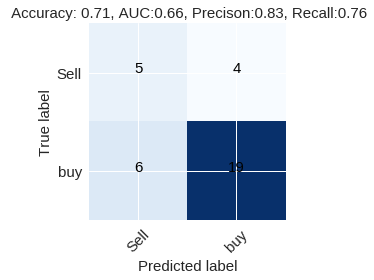

In [0]:
plot_confusion_matrix(cnf_matrix, classes=['Sell', 'buy'],
                        title=' Accuracy: ' +str(accuracy)
                        + ', AUC:' + str(auc)
                        + ', Precison:' + str(prec)
                        + ', Recall:' + str(recall)
                     )

In [0]:
plot_confusion_matrix(np.array(binaryLabels[:34]), np.argmax(model.predict([val_X]), axis =-1), 2)

In [0]:
val_y

array([[0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.]], dtype=float32)

In [0]:
!pip install SimpleITK

    100% |████████████████████████████████| 42.5MB 1.0MB/s 


In [0]:
!pip install downloaddata

  Could not find a version that satisfies the requirement downloaddata (from versions: )
No matching distribution found for downloaddata


In [0]:
import SimpleITK as sitk

# Utility method that either downloads data from the MIDAS repository or
# if already downloaded returns the file name for reading from disk (cached data).
# %run update_path_to_download_script
# from downloaddata import fetch_data as fdata

# Always write output to a separate directory, we don't want to pollute the source directory. 
import os
OUTPUT_DIR = 'Output'

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline

from ipywidgets import interact, fixed
from IPython.display import clear_output

# Callback invoked by the interact IPython method for scrolling through the image stacks of
# the two images (moving and fixed).
def display_images(fixed_image_z, moving_image_z, fixed_npa, moving_npa):
    # Create a figure with two subplots and the specified size.
    plt.subplots(1,2,figsize=(10,8))
    
    # Draw the fixed image in the first subplot.
    plt.subplot(1,2,1)
    plt.imshow(fixed_npa[fixed_image_z,:,:],cmap=plt.cm.Greys_r);
    plt.title('fixed image')
    plt.axis('off')
    
    # Draw the moving image in the second subplot.
    plt.subplot(1,2,2)
    plt.imshow(moving_npa[moving_image_z,:,:],cmap=plt.cm.Greys_r);
    plt.title('moving image')
    plt.axis('off')
    
    plt.show()

# Callback invoked by the IPython interact method for scrolling and modifying the alpha blending
# of an image stack of two images that occupy the same physical space. 
def display_images_with_alpha(image_z, alpha, fixed, moving):
    img = (1.0 - alpha)*fixed[:,:,image_z] + alpha*moving[:,:,image_z] 
    plt.imshow(sitk.GetArrayViewFromImage(img),cmap=plt.cm.Greys_r);
    plt.axis('off')
    plt.show()
    
# Callback invoked when the StartEvent happens, sets up our new data.
def start_plot():
    global metric_values, multires_iterations
    
    metric_values = []
    multires_iterations = []

# Callback invoked when the EndEvent happens, do cleanup of data and figure.
def end_plot():
    global metric_values, multires_iterations
    
    del metric_values
    del multires_iterations
    # Close figure, we don't want to get a duplicate of the plot latter on.
    plt.close()

# Callback invoked when the IterationEvent happens, update our data and display new figure.    
def plot_values(registration_method):
    global metric_values, multires_iterations
    
    metric_values.append(registration_method.GetMetricValue())                                       
    # Clear the output area (wait=True, to reduce flickering), and plot current data
    clear_output(wait=True)
    # Plot the similarity metric values
    plt.plot(metric_values, 'r')
    plt.plot(multires_iterations, [metric_values[index] for index in multires_iterations], 'b*')
    plt.xlabel('Iteration Number',fontsize=12)
    plt.ylabel('Metric Value',fontsize=12)
    plt.show()
    
# Callback invoked when the sitkMultiResolutionIterationEvent happens, update the index into the 
# metric_values list. 
def update_multires_iterations():
    global metric_values, multires_iterations
    multires_iterations.append(len(metric_values))     

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(3, 150, 150)
(3, 150, 150)
(3, 150, 150)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(3, 150, 150)
(3, 150, 150)
(3, 150, 150)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(3, 150, 150)
(3, 150, 150)
(3, 150, 150)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(3, 150, 150)
(3, 150, 150)
(3, 150, 150)
(3, 150, 150)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(3, 150, 150)
(3, 150, 150)
(3, 150, 150)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(3, 150, 150)
(3, 150, 150)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(3, 150, 150)


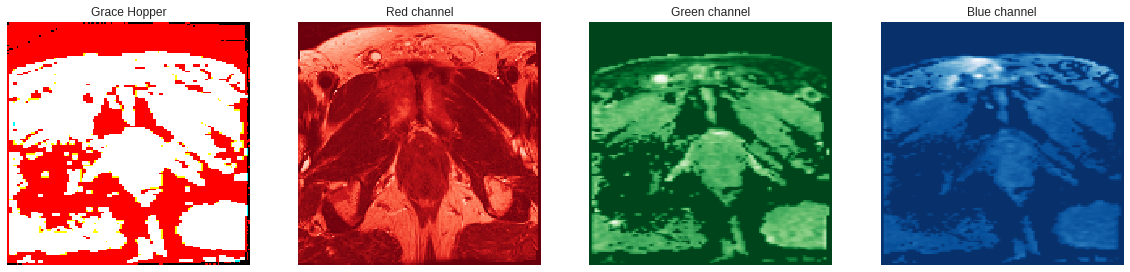

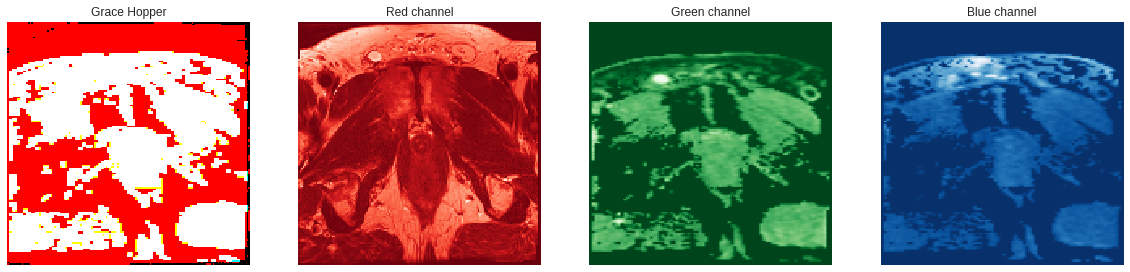

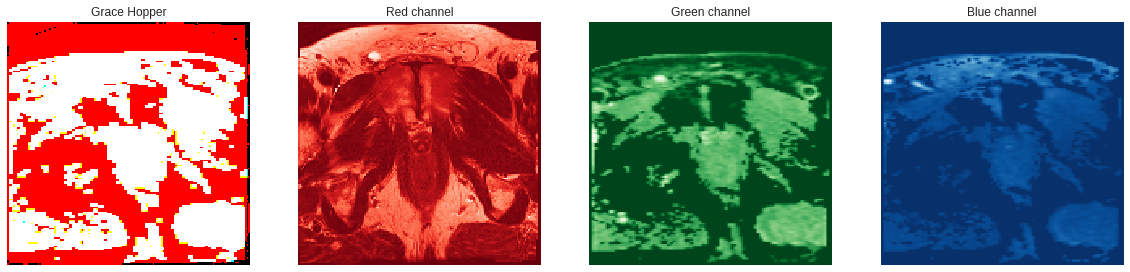

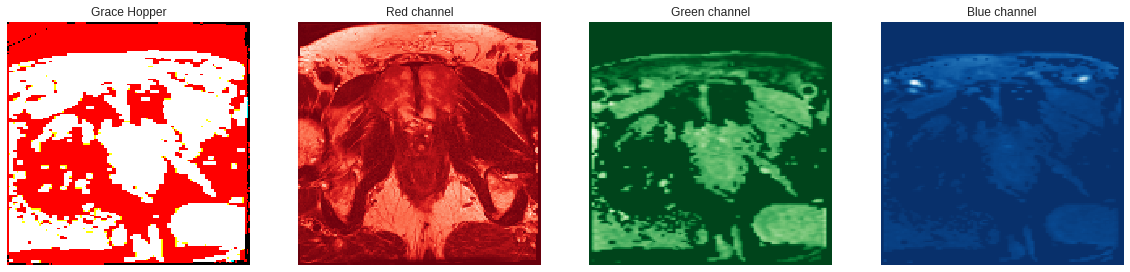

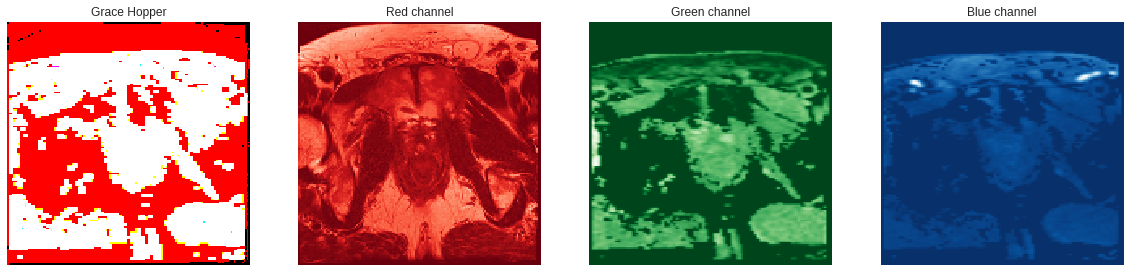

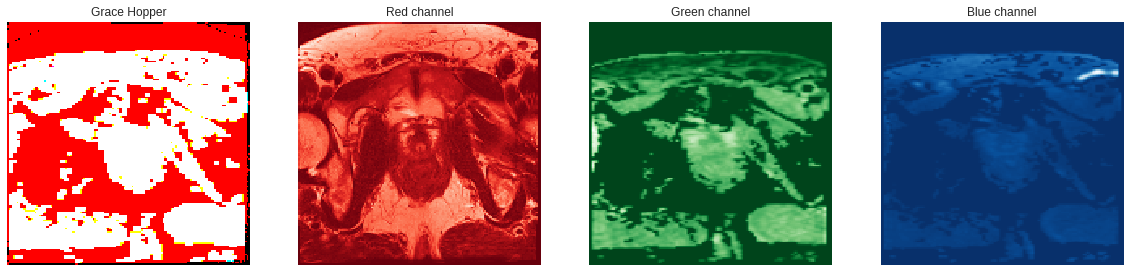

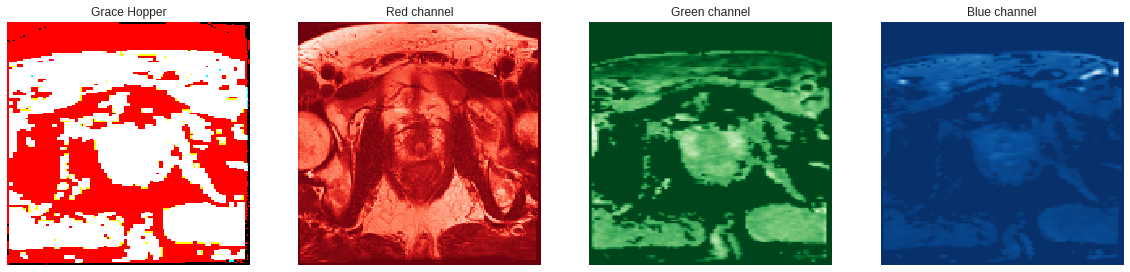

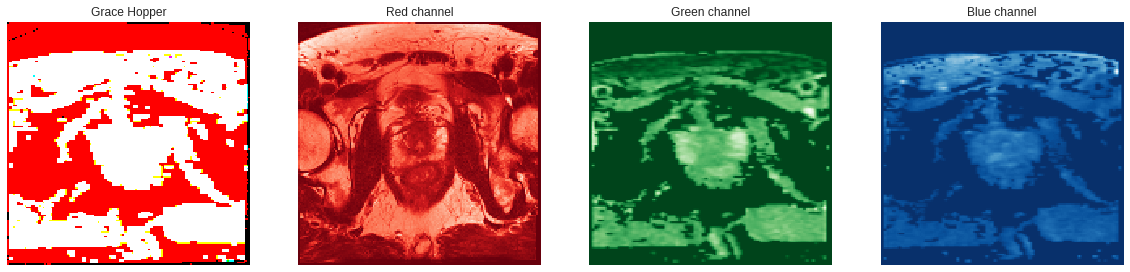

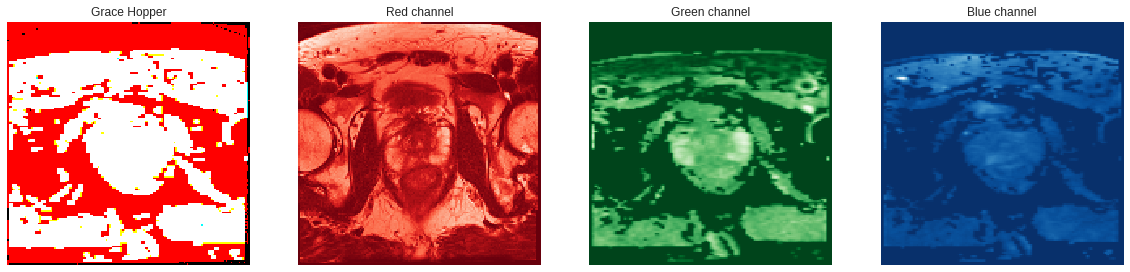

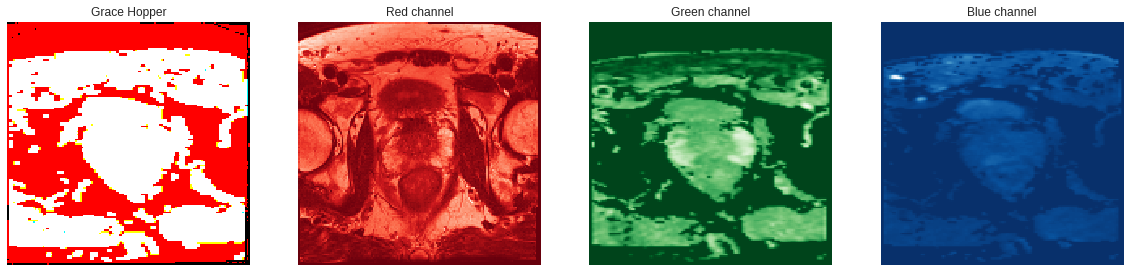

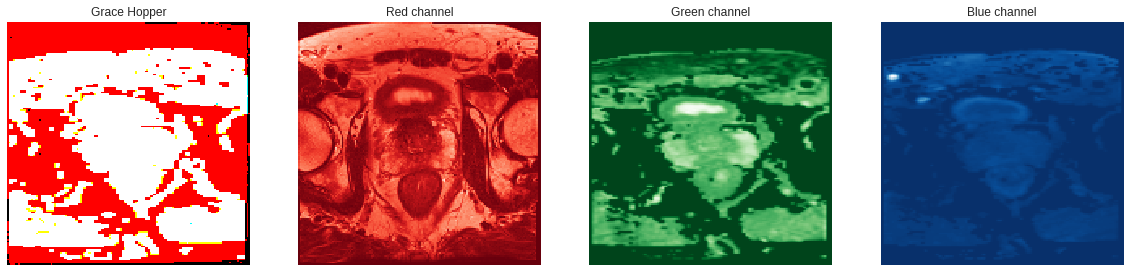

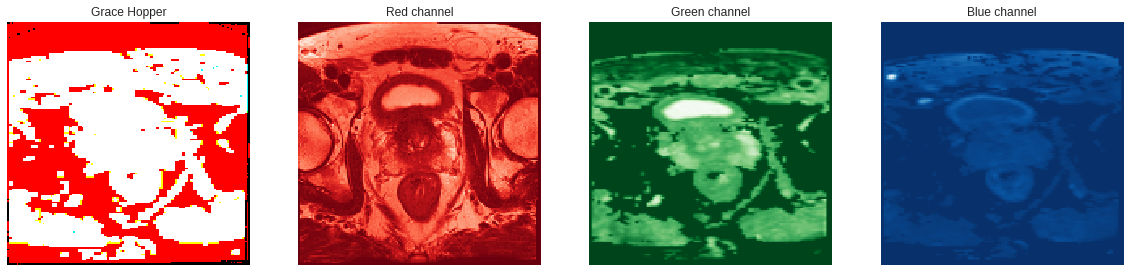

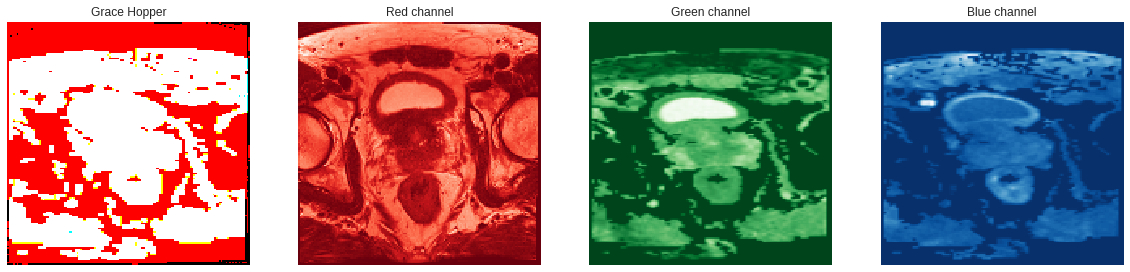

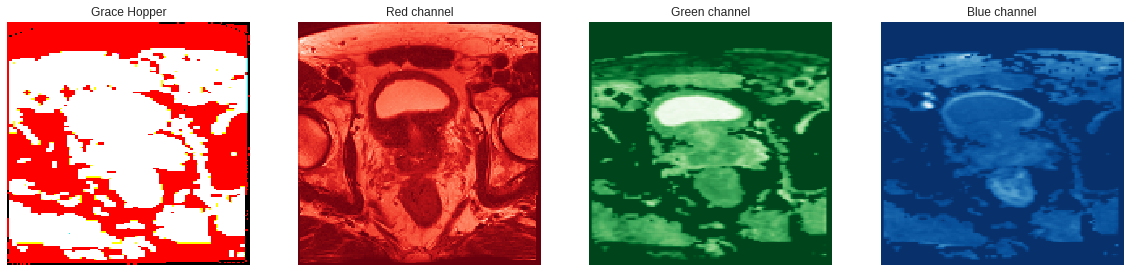

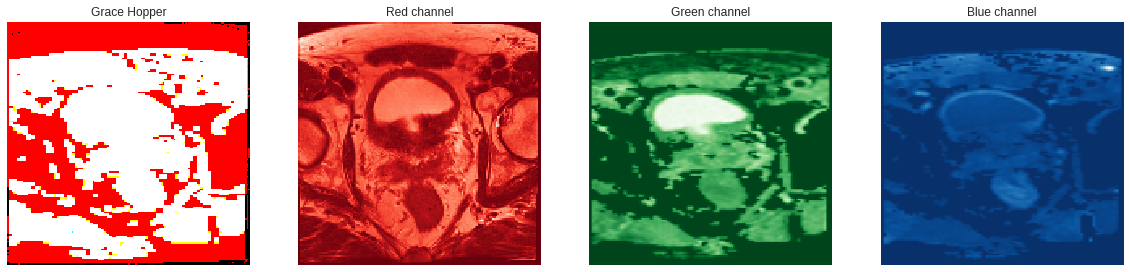

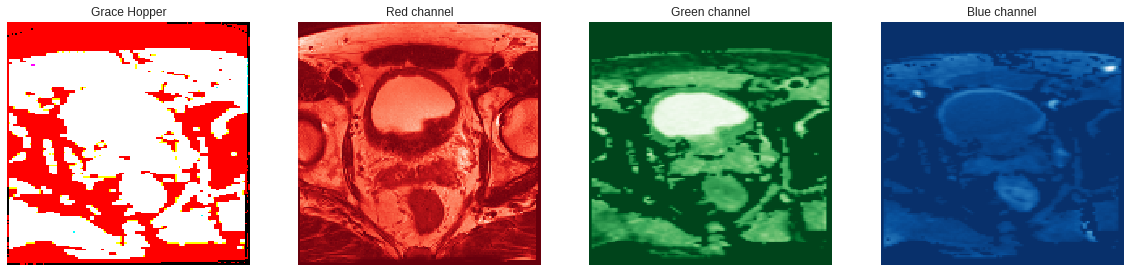

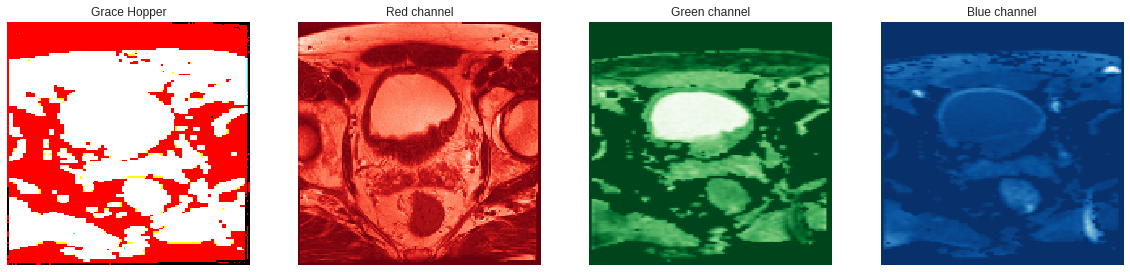

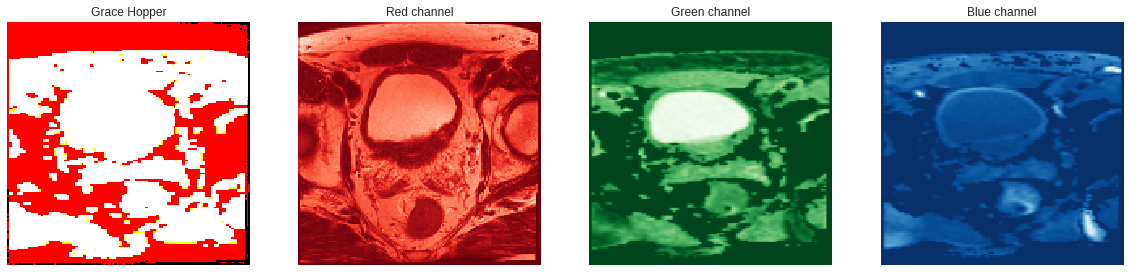

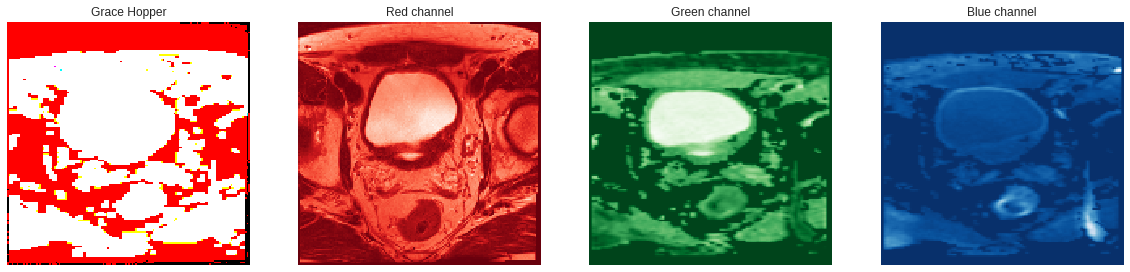

In [0]:
tranImages = []
for i in range(1):
  patient = Images[i]
  for j in range(patient.shape[0]):
    image = patient[j]

    titles = ['Grace Hopper', 'Red channel', 'Green channel', 'Blue channel']
    cmaps = [None, plt.cm.Reds_r, plt.cm.Greens_r, plt.cm.Blues_r]
    tranImages += [image.transpose(2,0,1)]
    print(image.transpose(2,0,1).shape)

    fig, axes = plt.subplots(1, 4, figsize=(20,5))
    objs = zip(axes, (image, *image.transpose(2,0,1)), titles, cmaps)
#     print(image.transpose(2,0,1)

    for ax, channel, title, cmap in objs:
        ax.imshow(channel, cmap=cmap)
        ax.set_title(title)
        ax.set_xticks(())
        ax.set_yticks(())

In [0]:
fixed_image = []
moving_image = []
for i in range(np.array(tranImages).shape[0]):
  fixed_image += [np.array(tranImages)[i][0]]
  moving_image += [np.array(tranImages)[i][1]]

fixed_image = np.array(fixed_image)
moving_image = np.array(moving_image)

In [0]:
fixed_image.shape

(19, 150, 150)

In [0]:
# fixed_image =  sitk.ReadImage(fdata("training_001_ct.mha"), sitk.sitkFloat32)
# moving_image = sitk.ReadImage(fdata("training_001_mr_T1.mha"), sitk.sitkFloat32) 

# interact(display_images, fixed_image_z=(0,fixed_image.GetSize()[2]-1), moving_image_z=(0,moving_image.GetSize()[2]-1), fixed_npa = fixed(sitk.GetArrayViewFromImage(fixed_image)), moving_npa=fixed(sitk.GetArrayViewFromImage(moving_image)));

In [0]:
initial_transform = sitk.CenteredTransformInitializer(fixed_image[0], 
                                                      moving_image[0], 
                                                      sitk.Euler3DTransform(), 
                                                      sitk.CenteredTransformInitializerFilter.GEOMETRY)

moving_resampled = sitk.Resample(moving_image, fixed_image, initial_transform, sitk.sitkLinear, 0.0, moving_image.GetPixelID())

# interact(display_images_with_alpha, image_z=(0,fixed_image.GetSize()[2]), alpha=(0.0,1.0,0.05), fixed = fixed(fixed_image), moving=fixed(moving_resampled));

In [0]:
registration_method = sitk.ImageRegistrationMethod()

# Similarity metric settings.
registration_method.SetMetricAsMattesMutualInformation(numberOfHistogramBins=50)
registration_method.SetMetricSamplingStrategy(registration_method.RANDOM)
registration_method.SetMetricSamplingPercentage(0.01)

registration_method.SetInterpolator(sitk.sitkLinear)

# Optimizer settings.
registration_method.SetOptimizerAsGradientDescent(learningRate=1.0, numberOfIterations=100, convergenceMinimumValue=1e-6, convergenceWindowSize=10)
registration_method.SetOptimizerScalesFromPhysicalShift()

# Setup for the multi-resolution framework.            
registration_method.SetShrinkFactorsPerLevel(shrinkFactors = [4,2,1])
registration_method.SetSmoothingSigmasPerLevel(smoothingSigmas=[2,1,0])
registration_method.SmoothingSigmasAreSpecifiedInPhysicalUnitsOn()

# Don't optimize in-place, we would possibly like to run this cell multiple times.
registration_method.SetInitialTransform(initial_transform, inPlace=False)

# Connect all of the observers so that we can perform plotting during registration.
registration_method.AddCommand(sitk.sitkStartEvent, start_plot)
registration_method.AddCommand(sitk.sitkEndEvent, end_plot)
registration_method.AddCommand(sitk.sitkMultiResolutionIterationEvent, update_multires_iterations) 
registration_method.AddCommand(sitk.sitkIterationEvent, lambda: plot_values(registration_method))

final_transform = registration_method.Execute(sitk.Cast(fixed_image, sitk.sitkFloat32), 
                                              sitk.Cast(moving_image, sitk.sitkFloat32))

In [0]:
for i in range(1):
  patient = Images[i]
  for j in range(patient.shape[0]):
    image = patient[j]

    titles = ['Grace Hopper', 'Red channel', 'Green channel', 'Blue channel']
    cmaps = [None, plt.cm.Reds_r, plt.cm.Greens_r, plt.cm.Blues_r]

    fig, axes = plt.subplots(1, 4, figsize=(20,5))
    objs = zip(axes, (image, *image.transpose(2,0,1)), titles, cmaps)

    for ax, channel, title, cmap in objs:
        ax.imshow(channel, cmap=cmap)
        ax.set_title(title)
        ax.set_xticks(())
        ax.set_yticks(())

In [0]:
!pip install dipy

    100% |████████████████████████████████| 7.9MB 5.9MB/s 


In [0]:
import numpy as np
from dipy.viz import regtools
from dipy.data import fetch_stanford_hardi, read_stanford_hardi
from dipy.data.fetcher import fetch_syn_data, read_syn_data
from dipy.align.imaffine import (transform_centers_of_mass,
                                 AffineMap,
                                 MutualInformationMetric,
                                 AffineRegistration)
from dipy.align.transforms import (TranslationTransform3D,
                                   RigidTransform3D,
                                   AffineTransform3D)
import nibabel as nib

In [0]:
fetch_stanford_hardi()
nib_stanford, gtab_stanford = read_stanford_hardi()
static = np.squeeze(nib_stanford.get_data())[..., 0]
static_grid2world = nib_stanford.affine

Creating new folder /root/.dipy/stanford_hardi
Download Progress: [##################################] 100.00%  of 87.15 MBDownloading "HARDI150.bval" to /root/.dipy/stanford_hardi
Download Progress: [##################################] 100.00%  of 0.00 MBDownloading "HARDI150.bvec" to /root/.dipy/stanford_hardi
Download Progress: [##################################] 100.00%  of 0.00 MBFiles successfully downloaded to /root/.dipy/stanford_hardi
Dataset is already in place. If you want to fetch it again please first remove the folder /root/.dipy/stanford_hardi 


In [0]:
moving_img = nib.load('ds114_sub009_highres_brain_222.nii')
template_img = nib.load('mni_icbm152_t1_tal_nlin_asym_09a_masked_222.nii')

In [0]:
# print(fixed_image.shape)
# print(moving_image.shape)


# moving_data = moving_img.get_data()
# moving_affine = moving_img.affine
# template_data = template_img.get_data()
# template_affine = template_img.affine

moving_data = moving_img.get_data()
print(moving_data.shape)
moving_affine = moving_img.affine
template_data = template_data = template_img.get_data()
print(moving_affine)
template_affine = template_img.affine

(88, 78, 128)
[[-2.00000000e+00  0.00000000e+00  0.00000000e+00  8.27012482e+01]
 [ 0.00000000e+00  2.60044456e+00 -2.60208455e-17 -8.66199341e+01]
 [-8.32667202e-17  7.74992870e-08  2.00000000e+00 -1.73332672e+02]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  1.00000000e+00]]


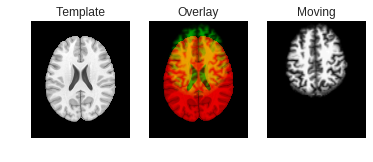

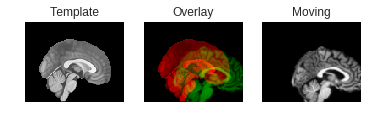

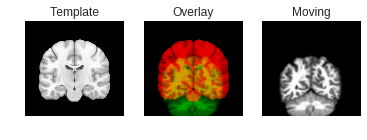

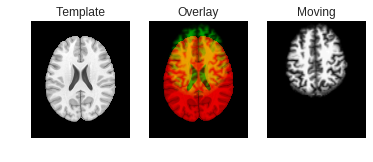

In [0]:
identity = np.eye(4)
affine_map = AffineMap(identity,
                       template_data.shape, template_affine,
                       moving_data.shape, moving_affine)

resampled = affine_map.transform(moving_data)

regtools.overlay_slices(template_data, resampled, None, 0,
                        "Template", "Moving")

regtools.overlay_slices(template_data, resampled, None, 1,
                        "Template", "Moving")

regtools.overlay_slices(template_data, resampled, None, 2,
                        "Template", "Moving")

In [0]:
from google.colab import files
uploaded = files.upload()

Saving 20110707114731_ep2d_diff_tra_7.nii to 20110707114731_ep2d_diff_tra_7.nii
Saving 20110707114731_t2_tse_tra_4.nii to 20110707114731_t2_tse_tra_4.nii


In [0]:
moving_img = nib.load('20110707114731_ep2d_diff_tra_7.nii')
template_img = nib.load('20110707114731_t2_tse_tra_4.nii')


static = np.squeeze(nib_stanford.get_data())[..., 0]
static_grid2world = nib_stanford.affine

In [0]:
moving = moving_img.get_data()
print(moving_data.shape)
moving_grid2world = moving_img.affine
static = template_img.get_data()
print(moving_affine)
static_grid2world = template_img.affine

(84, 128, 19)
[[-1.99999845e+00  4.00670191e-10 -3.77059286e-03  4.56854477e+01]
 [ 7.97220971e-04  1.89675295e+00 -9.51440334e-01 -1.28171722e+02]
 [-2.38395948e-03  6.34293675e-01  2.84512877e+00 -9.75016937e+01]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  1.00000000e+00]]


In [0]:
!ls

20110707114731_ep2d_diff_tra_7.nii  transformed_com_1.png
20110707114731_t2_tse_sag_3.nii     transformed_com_2.png
20110707114731_t2_tse_tra_4.nii     transformed_rigid_0.png
resampled_0.png			    transformed_rigid_1.png
resampled_1.png			    transformed_rigid_2.png
resampled_2.png			    transformed_trans_0.png
sample_data			    transformed_trans_1.png
transformed_com_0.png		    transformed_trans_2.png


In [0]:
resampled.shape

(384, 384, 19)

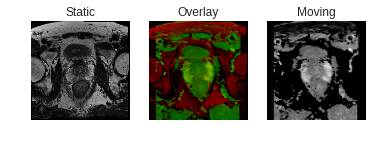

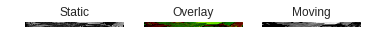

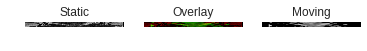

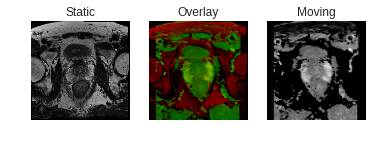

In [0]:
identity = np.eye(4)
affine_map = AffineMap(identity,
                       static.shape, static_grid2world,
                       moving.shape, moving_grid2world)
resampled = affine_map.transform(moving)
regtools.overlay_slices(static, resampled, None, 0,
                        "Static", "Moving", "resampled_0.png")
regtools.overlay_slices(static, resampled, None, 1,
                        "Static", "Moving", "resampled_1.png")
regtools.overlay_slices(static, resampled, None, 2,
                        "Static", "Moving", "resampled_2.png")

In [0]:
c_of_mass = transform_centers_of_mass(static, static_grid2world,
                                      moving, moving_grid2world)

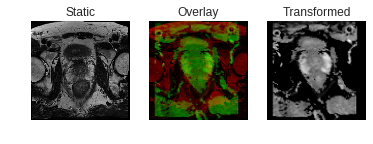

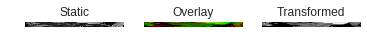

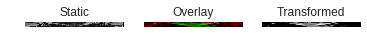

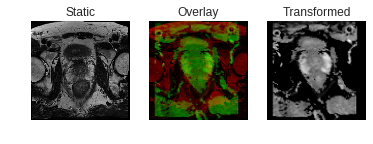

In [0]:
transformed = c_of_mass.transform(moving)
regtools.overlay_slices(static, transformed, None, 0,
                        "Static", "Transformed", "transformed_com_0.png")
regtools.overlay_slices(static, transformed, None, 1,
                        "Static", "Transformed", "transformed_com_1.png")
regtools.overlay_slices(static, transformed, None, 2,
                        "Static", "Transformed", "transformed_com_2.png")

In [0]:
nbins = 32
sampling_prop = None
metric = MutualInformationMetric(nbins, sampling_prop)

In [0]:
level_iters = [10000, 1000, 100]
sigmas = [3.0, 1.0, 0.0]
factors = [4, 2, 1]

In [0]:
affreg = AffineRegistration(metric=metric,
                            level_iters=level_iters,
                            sigmas=sigmas,
                            factors=factors)

In [0]:
transform = TranslationTransform3D()
params0 = None
starting_affine = c_of_mass.affine
translation = affreg.optimize(static, moving, transform, params0,
                              static_grid2world, moving_grid2world,
                              starting_affine=starting_affine)

Optimizing level 2 [max iter: 10000]
Optimizing level 1 [max iter: 1000]
Optimizing level 0 [max iter: 100]


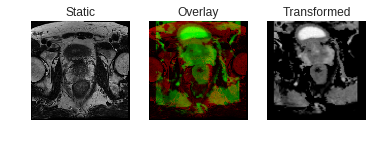

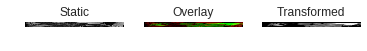

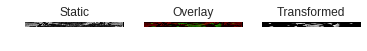

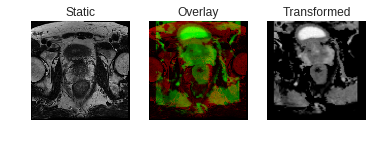

In [0]:
transformed = translation.transform(moving)
regtools.overlay_slices(static, transformed, None, 0,
                        "Static", "Transformed", "transformed_trans_0.png")
regtools.overlay_slices(static, transformed, None, 1,
                        "Static", "Transformed", "transformed_trans_1.png")
regtools.overlay_slices(static, transformed, None, 2,
                        "Static", "Transformed", "transformed_trans_2.png")

In [0]:
transform = RigidTransform3D()
params0 = None
starting_affine = translation.affine
rigid = affreg.optimize(static, moving, transform, params0,
                        static_grid2world, moving_grid2world,
                        starting_affine=starting_affine)

Optimizing level 2 [max iter: 10000]
Optimizing level 1 [max iter: 1000]
Optimizing level 0 [max iter: 100]


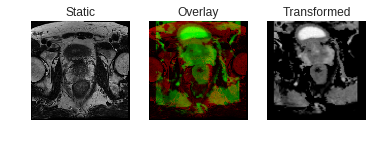

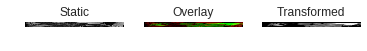

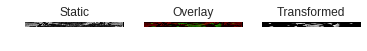

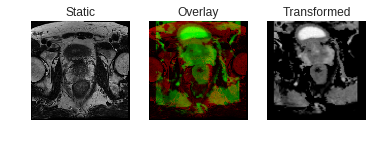

In [0]:
transformed = rigid.transform(moving)
regtools.overlay_slices(static, transformed, None, 0,
                        "Static", "Transformed", "transformed_rigid_0.png")
regtools.overlay_slices(static, transformed, None, 1,
                        "Static", "Transformed", "transformed_rigid_1.png")
regtools.overlay_slices(static, transformed, None, 2,
                        "Static", "Transformed", "transformed_rigid_2.png")